In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Juego de tronos

## Cargamos y visualizamos un grafo

https://www.kaggle.com/mmmarchetti/game-of-thrones-network-analysis

```
# Tiene formato de código
```



En este grafo, se crea un edge (conexión) entre dos personajes (nodos) cuando sus nombres aparecen en una vecindad de 15 palabras en los libros.

Este enlace contiene un grafo por cada libro:

In [ ]:
FILE_PATH = 'https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/'
book_fnames = ['asoiaf-book1-edges.csv','asoiaf-book2-edges.csv','asoiaf-book3-edges.csv','asoiaf-book4-edges.csv','asoiaf-book5-edges.csv']

Vamos a cargar y visualizar el grafo del primer libro:

In [ ]:
book1 = pd.read_csv(FILE_PATH+book_fnames[0])
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


Creamos una lista de grafos (books) y cargamos el grafo de cada libro en la lista:

In [ ]:
# Creating a list of networks for all the books
books = []

for book_fname in book_fnames:
    book = pd.read_csv(FILE_PATH+book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

Dibujamos el grafo del primer libro: books[0]

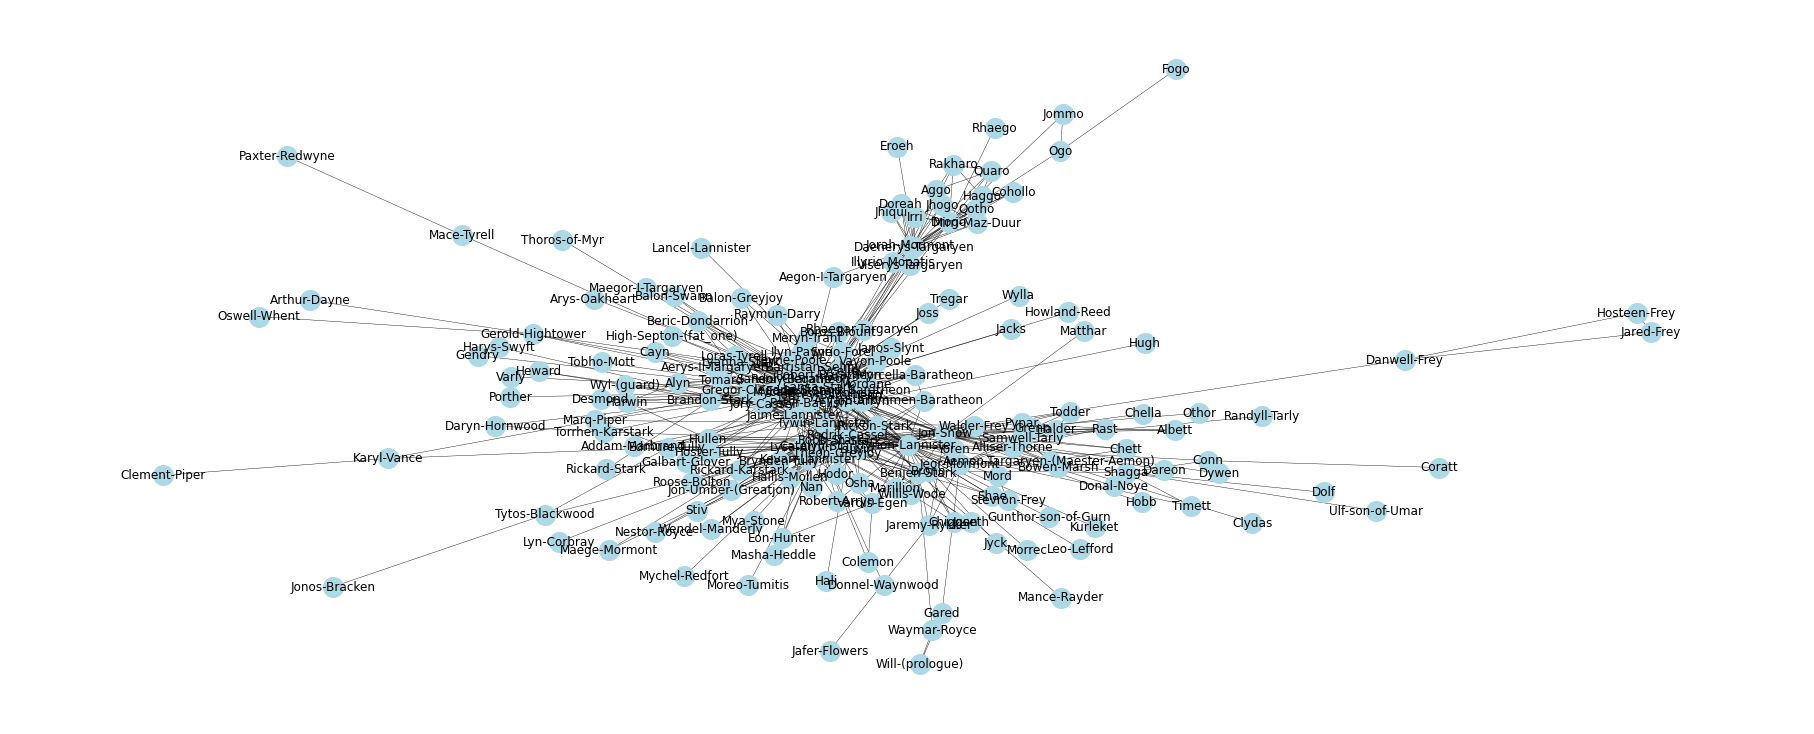

In [ ]:
plt.figure(figsize=(25,10))
nx.draw(books[0],  with_labels = True, width=0.4, node_color='lightblue', node_size=400)

Cada personaje puede aparecer varias veces asociado a otro, porque tengan más de una ocurrencia juntos. El peso indica el número de ocurrencias:

In [ ]:
jaime_graph = books[0].edges(['Jaime-Lannister'], data='weight')
jaime_graph

EdgeDataView([('Jaime-Lannister', 'Addam-Marbrand', 3), ('Jaime-Lannister', 'Aerys-II-Targaryen', 5), ('Jaime-Lannister', 'Barristan-Selmy', 4), ('Jaime-Lannister', 'Brynden-Tully', 7), ('Jaime-Lannister', 'Catelyn-Stark', 9), ('Jaime-Lannister', 'Cersei-Lannister', 16), ('Jaime-Lannister', 'Eddard-Stark', 27), ('Jaime-Lannister', 'Edmure-Tully', 4), ('Jaime-Lannister', 'Galbart-Glover', 3), ('Jaime-Lannister', 'Gregor-Clegane', 3), ('Jaime-Lannister', 'Harys-Swyft', 3), ('Jaime-Lannister', 'Joffrey-Baratheon', 12), ('Jaime-Lannister', 'Jon-Arryn', 5), ('Jaime-Lannister', 'Jory-Cassel', 4), ('Jaime-Lannister', 'Kevan-Lannister', 4), ('Jaime-Lannister', 'Loras-Tyrell', 3), ('Jaime-Lannister', 'Lysa-Arryn', 6), ('Jaime-Lannister', 'Petyr-Baelish', 7), ('Jaime-Lannister', 'Renly-Baratheon', 4), ('Jaime-Lannister', 'Rickard-Karstark', 3), ('Jaime-Lannister', 'Robb-Stark', 9), ('Jaime-Lannister', 'Robert-Baratheon', 24), ('Jaime-Lannister', 'Rodrik-Cassel', 3), ('Jaime-Lannister', 'Sandor-C

Ahora visualizamos el subgrafo para un personaje en concreto, con y sin pesos. Los pesos indican las veces que interactúa cada par de personajes:

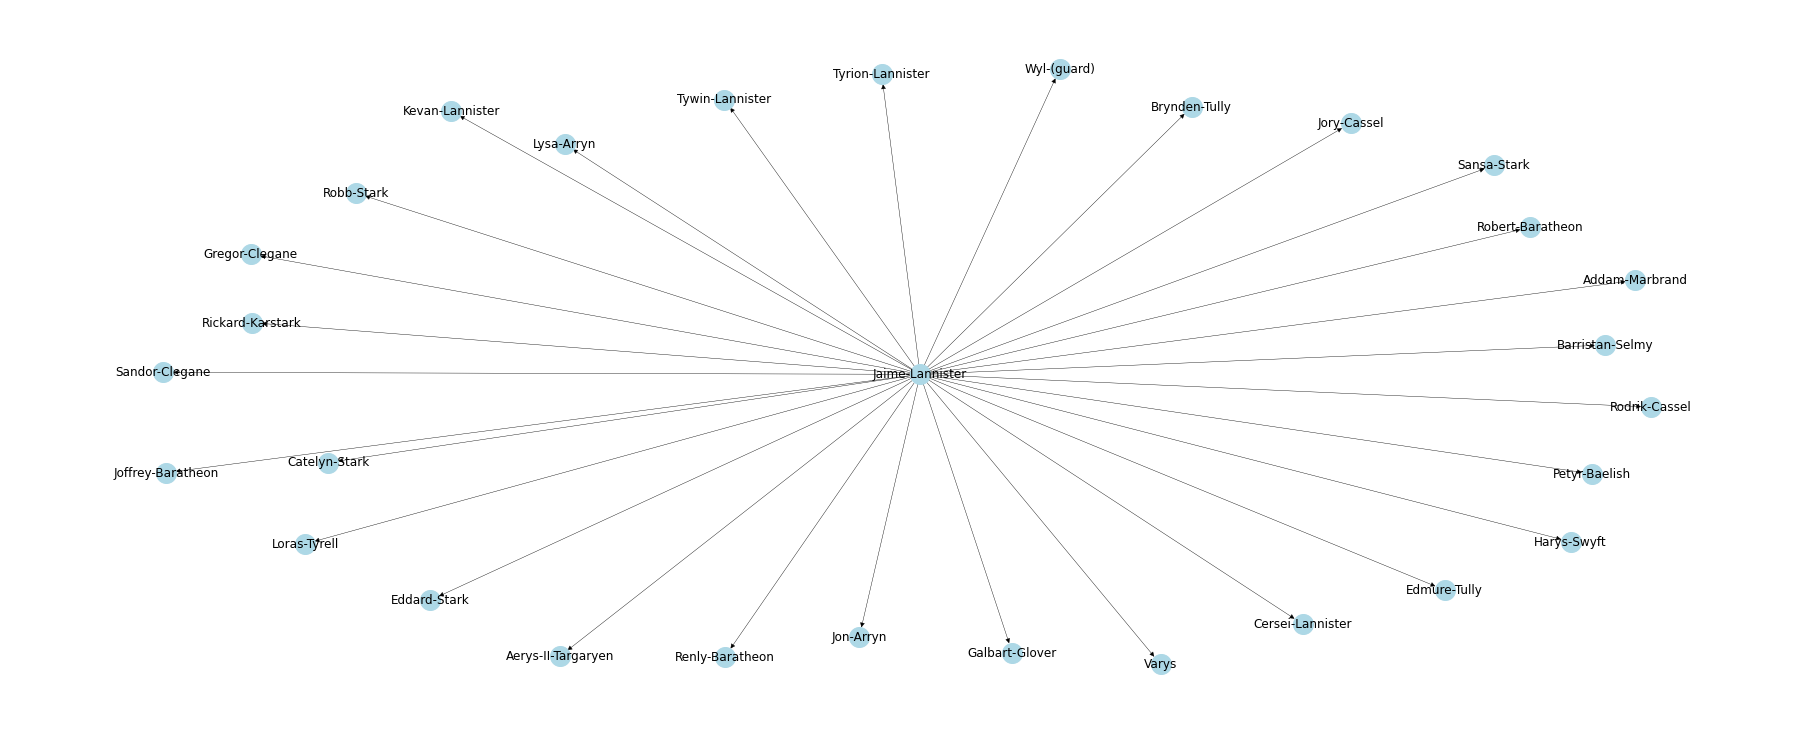

In [ ]:
jaime_graph = nx.edges(books[0], ['Jaime-Lannister'])
plt.figure(figsize=(25,10))
G = nx.DiGraph()
G.add_edges_from(jaime_graph)
nx.draw(G,  with_labels = True, width=0.4, node_color='lightblue', node_size=400)
plt.show()

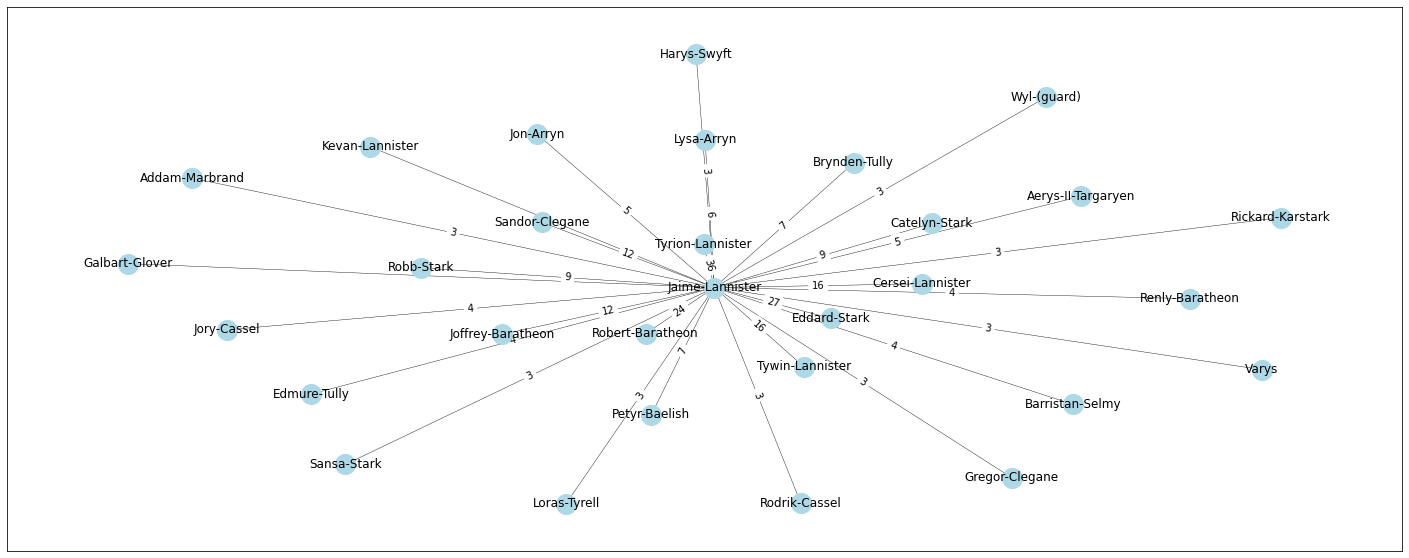

In [ ]:
jaime_graph = books[0].edges(['Jaime-Lannister'], data='weight')
plt.figure(figsize=(25,10))
G = nx.Graph()
G.add_weighted_edges_from(jaime_graph)
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos, width=0.4, node_color='lightblue', node_size=400)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
plt.show()

## Importancia de personajes a lo largo del tiempo

Vamos a calcular la importancia de cada personaje en el primer libro. Para eso calculamos el degree_centrality de cada nodo, que se define como el número de conexiones que tiene ese nodo con otros, dividido entre el número de posibles conexiones (número de nodos - 1 ):

In [ ]:
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html

In [ ]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

Si ordenamos de mayor a menor, tenemos que estos son los personajes más importantes:

In [ ]:
sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

Eddard-Stark aparece 51 veces como nodo fuente, y 15 veces como objetivo

In [ ]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [ ]:
len(book1[book1['Source']=='Eddard-Stark'])

51

In [ ]:
len(book1[book1['Target']=='Eddard-Stark'])

15

El número total de posibles conexiones es el número total de nodos - 1:

In [ ]:
len(deg_cen_book1) - 1

186

Es decir, que el degree_centrality para Eddard Stark debería de ser:

In [ ]:
(len(book1[book1['Source']=='Eddard-Stark'])+len(book1[book1['Target']=='Eddard-Stark']))/(len(deg_cen_book1) - 1)         #(51+15)/(187-1)

0.3548387096774194

¡Efectivamente! Eso es lo que nos salía.

Ahora vamos a ver la evolución de importancia por libro, para 3 personajes en concreto:

In [ ]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

In [ ]:
degree_evol_df

,Addam-Marbrand,Jaime-Lannister,Tywin-Lannister,Aegon-I-Targaryen,Daenerys-Targaryen,Eddard-Stark,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Bowen-Marsh,Chett,Clydas,Jeor-Mormont,Jon-Snow,Samwell-Tarly,Aerys-II-Targaryen,Brandon-Stark,Gerold-Hightower,Jon-Arryn,Robert-Baratheon,Aggo,Drogo,Jhogo,Jorah-Mormont,Quaro,Rakharo,Albett,Halder,Rast,Grenn,Pypar,Tyrion-Lannister,Alyn,Harwin,Jory-Cassel,Tomard,Arthur-Dayne,Arya-Stark,Benjen-Stark,Bran-Stark,Catelyn-Stark,...,Leathers,Rory,Harl,Myles-Toyne,Harwood-Stout,Marghaz-zo-Loraq,Rowan,Hoster-Blackwood,Hother-Umber,Rhaegar-Frey,Squirrel,Nyessos-Vhassar,Patrek-of-Kings-Mountain,Soren-Shieldbreaker,Tom-Barleycorn,Toregg,Ulmer,Wun-Weg-Wun-Dar-Wun,Nurse,Richard-Horpe,Kerwin,Longwater-Pyke,Luton,Lyanna-Mormont,Malaquo-Maegyr,Rodrik-Sparr,Morgo,Yezzan-zo-Qaggaz,Old-Bill-Bone,Sweets,Yellow-Dick,Walda-Frey-(daughter-of-Merrett),Roose-Ryswell,Scar,Shrouded-Lord,Theomore,William-Foxglove,Willow-Witch-eye,Thistle,Wulfe
0,0.010753,0.155914,0.118280,0.010753,0.112903,0.354839,0.037634,0.053763,0.026882,0.016129,0.005376,0.069892,0.198925,0.064516,0.032258,0.032258,0.026882,0.080645,0.268817,0.032258,0.102151,0.032258,0.069892,0.026882,0.026882,0.016129,0.043011,0.032258,0.037634,0.037634,0.247312,0.026882,0.021505,0.112903,0.037634,0.005376,0.145161,0.075269,0.172043,0.231183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.081395,0.065891,0.019380,0.069767,0.085271,0.023256,0.015504,NaN,0.003876,NaN,0.058140,0.108527,0.023256,0.019380,NaN,NaN,NaN,0.100775,0.019380,0.015504,0.015504,0.038760,NaN,0.011628,NaN,NaN,NaN,0.011628,NaN,0.205426,NaN,NaN,NaN,NaN,NaN,0.155039,0.003876,0.116279,0.127907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.026490,0.149007,0.096026,0.009934,0.079470,0.052980,0.059603,0.023179,0.033113,0.016556,0.013245,0.059603,0.172185,0.099338,0.029801,0.009934,0.013245,0.009934,0.086093,0.006623,0.013245,0.009934,0.039735,NaN,0.009934,NaN,0.006623,NaN,0.039735,0.039735,0.195364,NaN,0.023179,NaN,NaN,0.016556,0.122517,0.013245,0.056291,0.125828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.014652,0.234432,0.058608,NaN,NaN,0.029304,0.025641,NaN,NaN,NaN,0.007326,0.007326,0.040293,0.073260,0.032967,NaN,NaN,0.021978,0.047619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007326,0.007326,0.095238,NaN,NaN,NaN,NaN,NaN,0.058608,NaN,0.014652,0.040293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.031646,0.028481,0.003165,0.183544,0.044304,0.015823,0.003165,0.028481,NaN,0.015823,0.006329,0.196203,0.012658,0.009494,NaN,NaN,NaN,0.047468,0.018987,0.006329,0.022152,0.012658,NaN,0.018987,NaN,NaN,NaN,0.006329,0.009494,0.104430,NaN,NaN,NaN,NaN,NaN,0.037975,0.003165,0.037975,0.003165,...,0.015823,0.006329,0.003165,0.006329,0.003165,0.003165,0.015823,0.003165,0.012658,0.006329,0.012658,0.006329,0.012658,0.003165,0.003165,0.009494,0.003165,0.012658,0.012658,0.006329,0.003165,0.003165,0.003165,0.003165,0.003165,0.006329,0.003165,0.015823,0.003165,0.009494,0.009494,0.006329,0.003165,0.006329,0.003165,0.006329,0.003165,0.003165,0.003165,0.003165


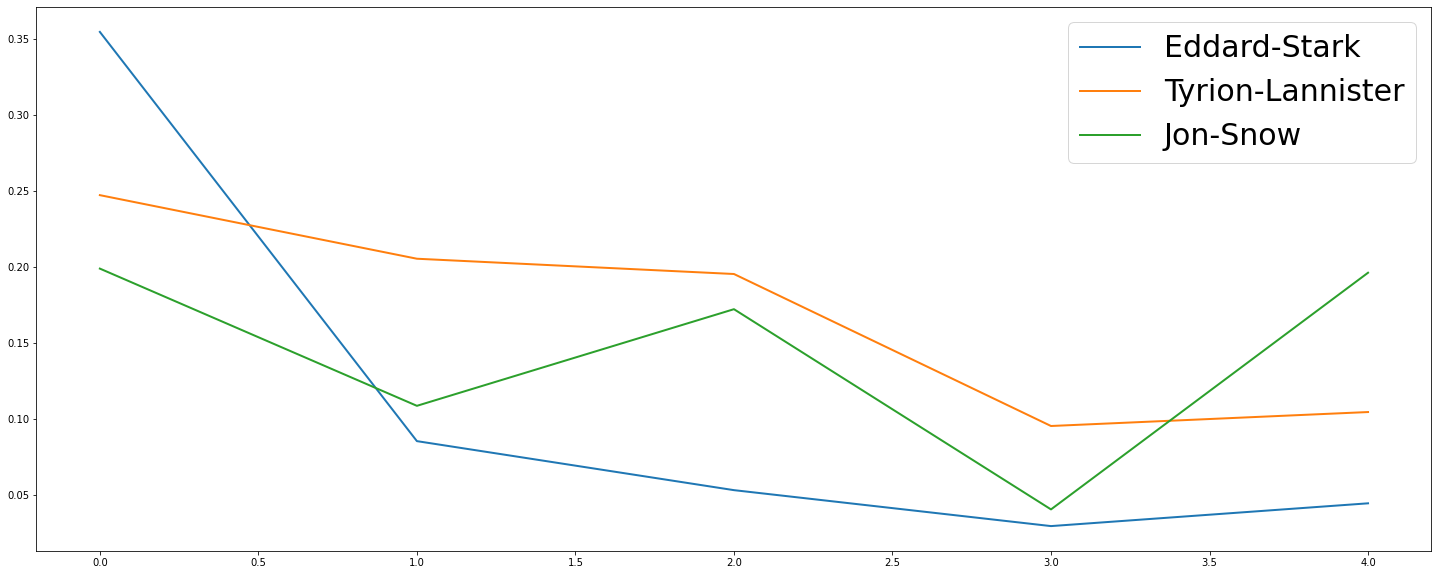

In [ ]:
# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
fig, ax = plt.subplots(figsize=(25, 10))
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot(ax=ax,linewidth=2, markersize=12)
plt.legend( prop={'size': 30})
plt.show()

## Cálculo de comunidades

https://ericmjl.github.io/Network-Analysis-Made-Simple/05-casestudies/01-gameofthrones/

Ahora vamos a buscar comunidades en el grafo del primer libro con el método de de Louvain para detección de comunidades

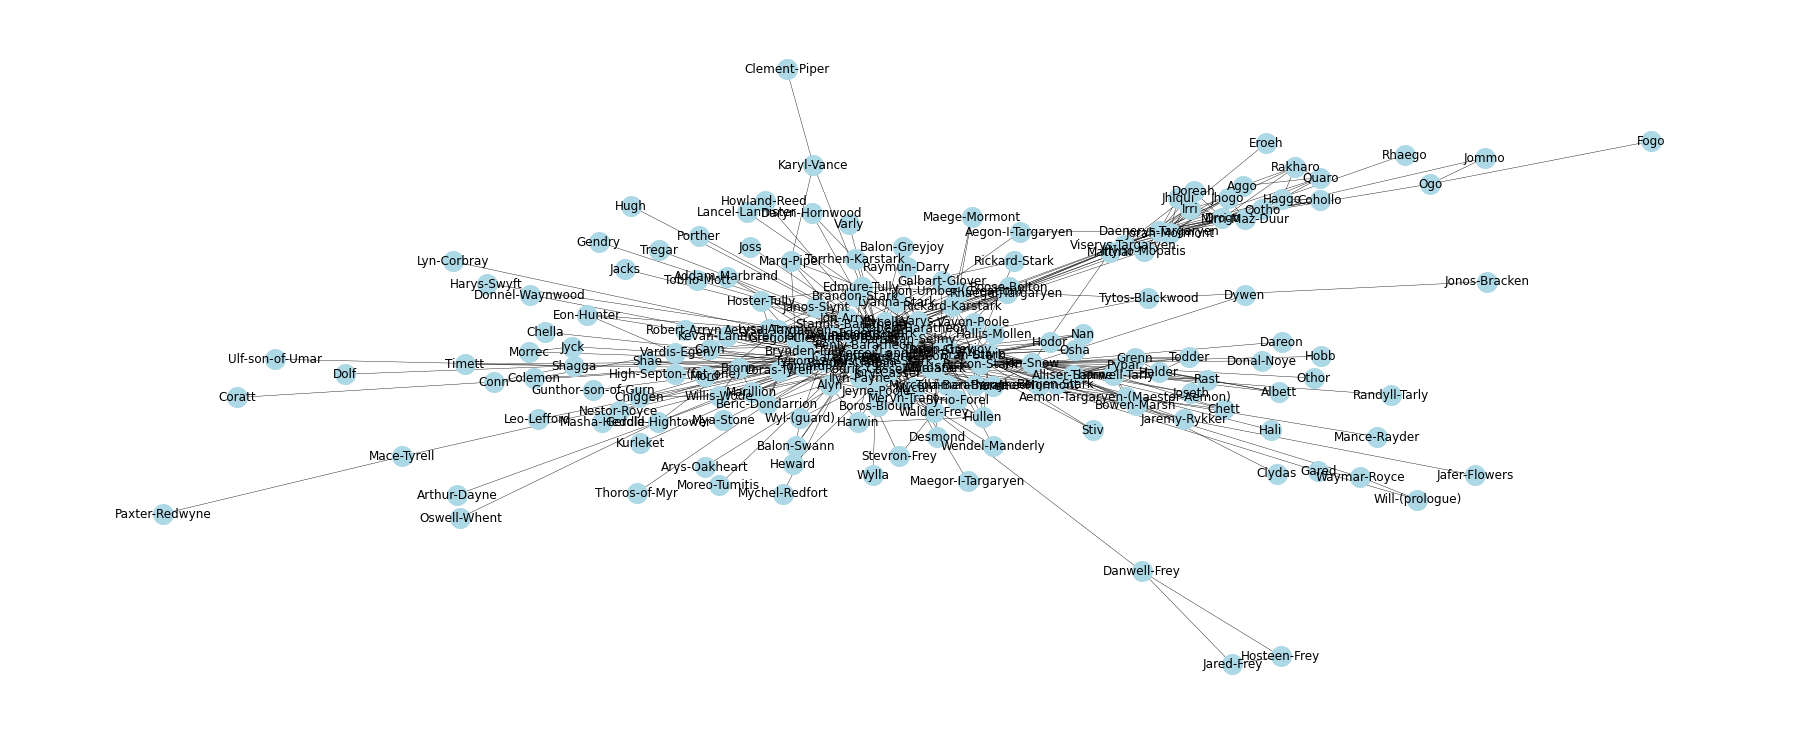

In [ ]:
plt.figure(figsize=(25,10))
# draw the graph
pos = nx.spring_layout(books[0])
nx.draw(books[0], pos=pos, with_labels = True, width=0.4, node_color='lightblue', node_size=400)

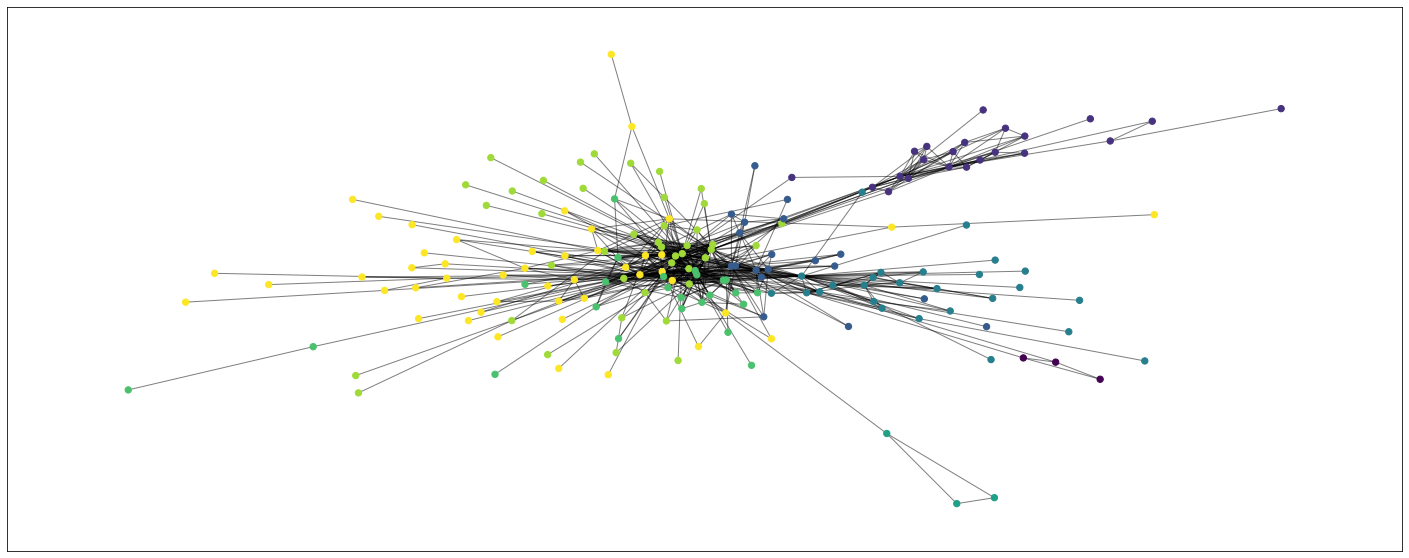

In [ ]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

fig, ax = plt.subplots(figsize=(25, 10))
G = books[0]
#first compute the best partition
partition = community_louvain.best_partition(G, randomize=False)

# draw the graph
#pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Hemos encontrado 8 comunidades:

In [ ]:
# louvain community detection find us 8 different set of communities
partition_dict = {}
for character, par in partition.items():
    if par in partition_dict:
        partition_dict[par].append(character)
    else:
        partition_dict[par] = [character]

In [ ]:
len(partition_dict)

8

Dibujamos la primera comunidad:

In [ ]:
partition_dict[0]

['Waymar-Royce', 'Gared', 'Will-(prologue)']

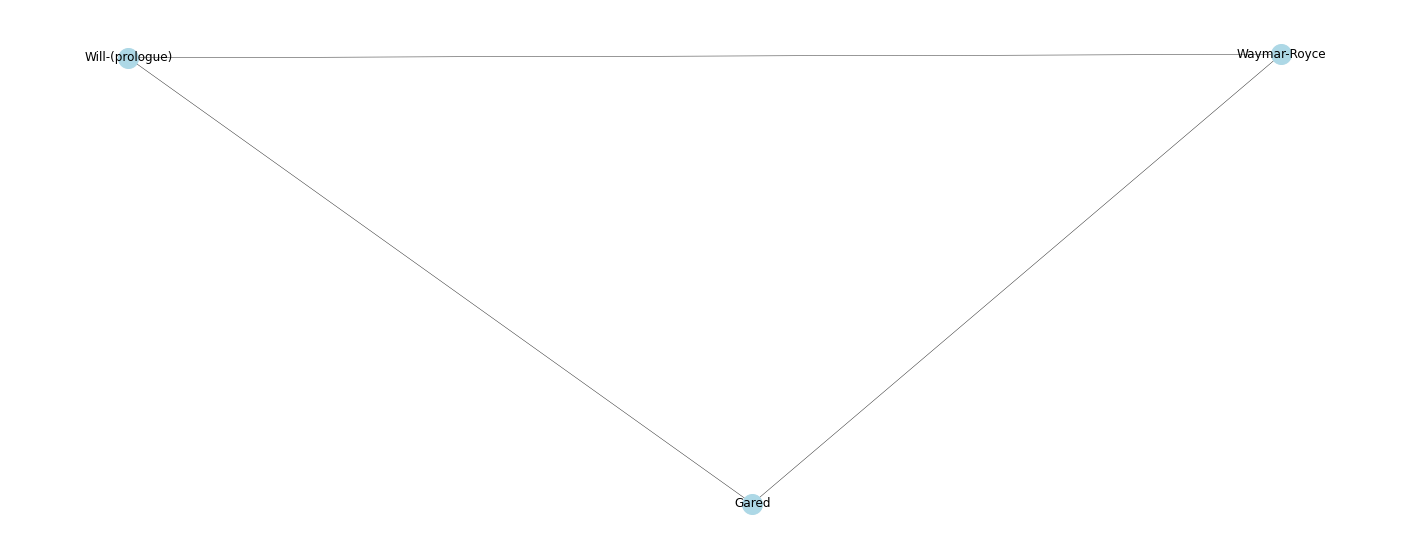

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[0]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

La segunda comunidad:

In [ ]:
partition_dict[1]

['Aegon-I-Targaryen',
 'Daenerys-Targaryen',
 'Aggo',
 'Drogo',
 'Jhogo',
 'Jorah-Mormont',
 'Quaro',
 'Rakharo',
 'Cohollo',
 'Haggo',
 'Qotho',
 'Doreah',
 'Eroeh',
 'Illyrio-Mopatis',
 'Irri',
 'Jhiqui',
 'Mirri-Maz-Duur',
 'Viserys-Targaryen',
 'Jommo',
 'Ogo',
 'Rhaego',
 'Fogo']

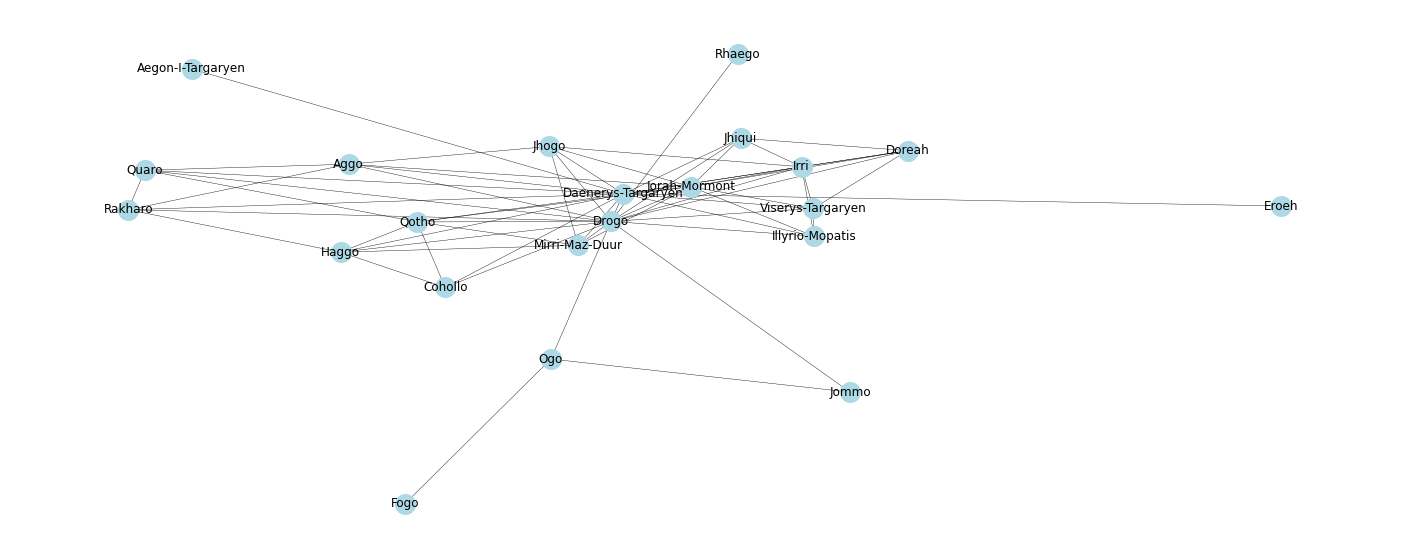

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[1]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

La tercera comunidad:

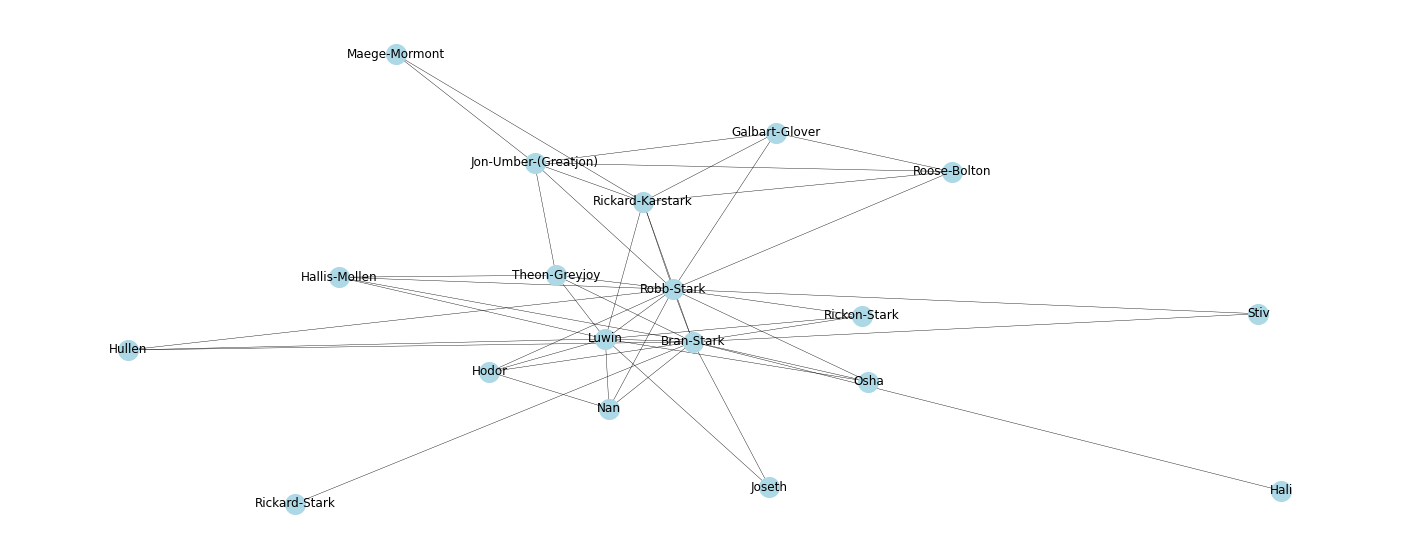

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[2]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

La cuarta comunidad:

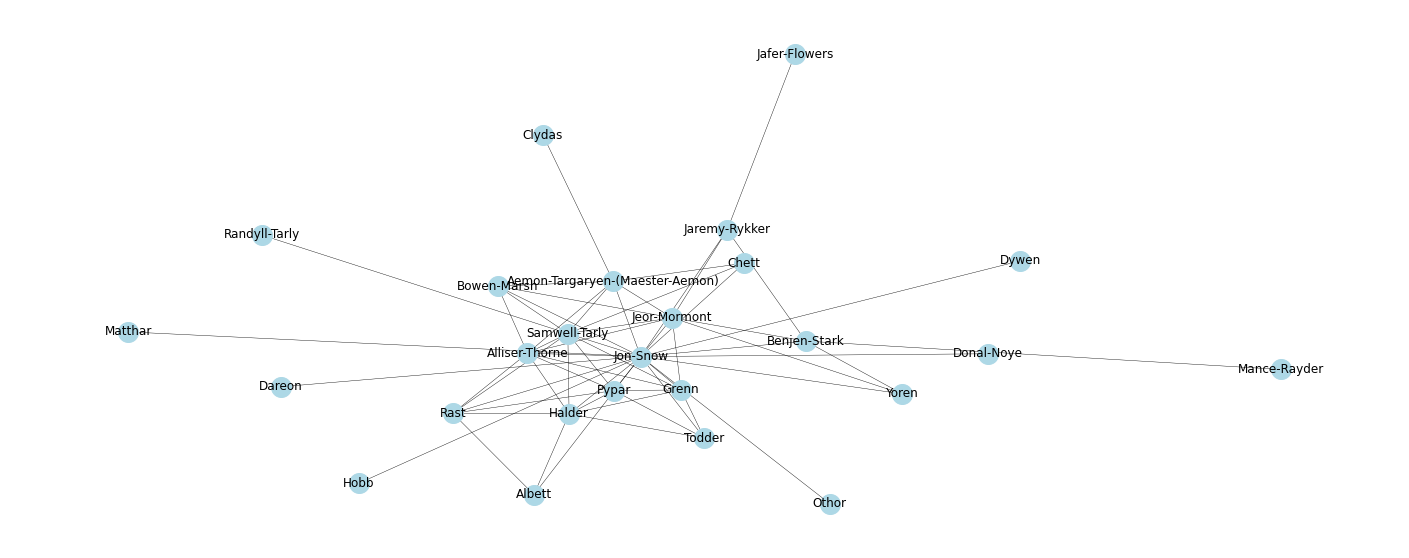

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[3]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

La quinta comunidad:

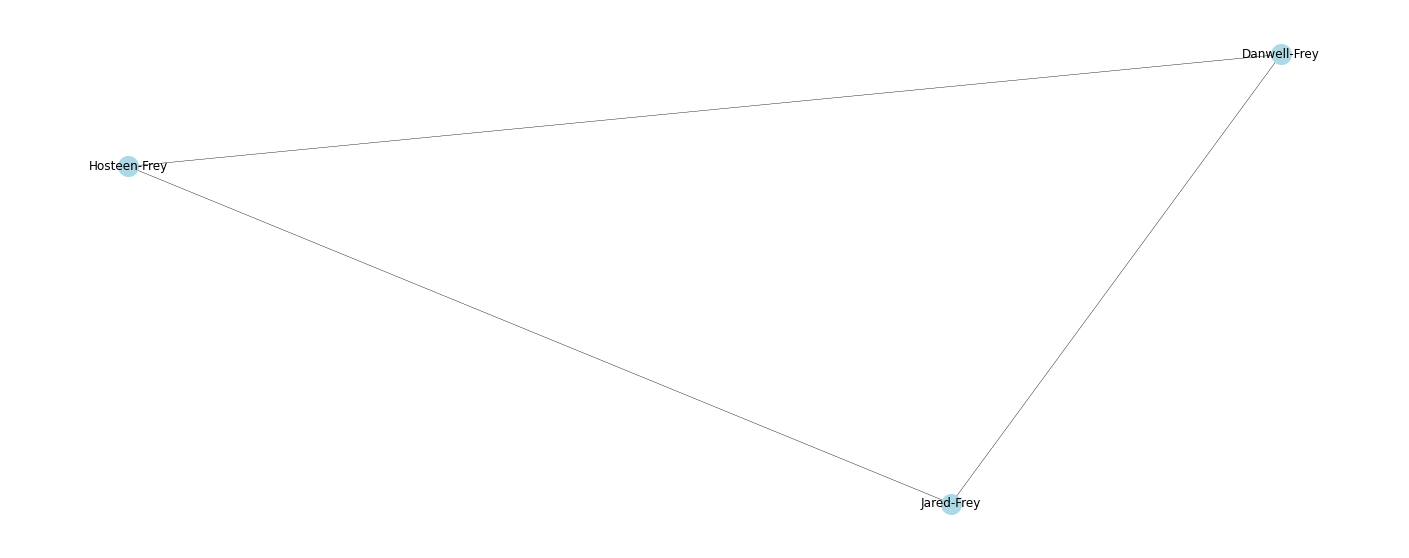

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[4]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

La sexta comunidad:

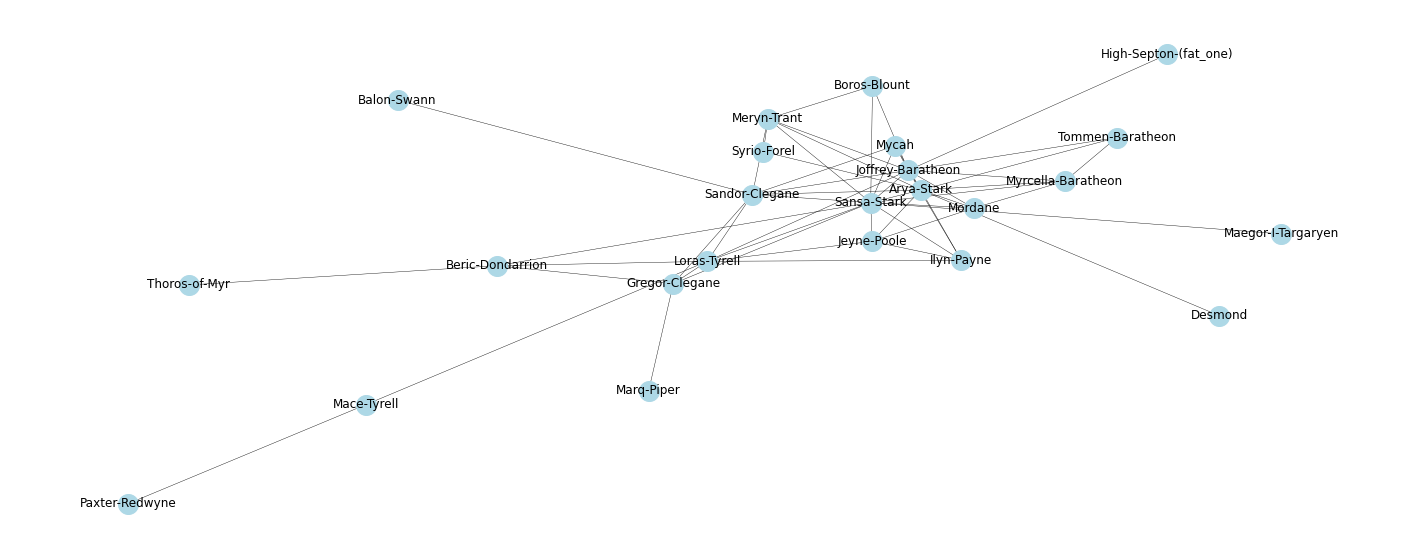

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[5]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

La séptima comunidad:

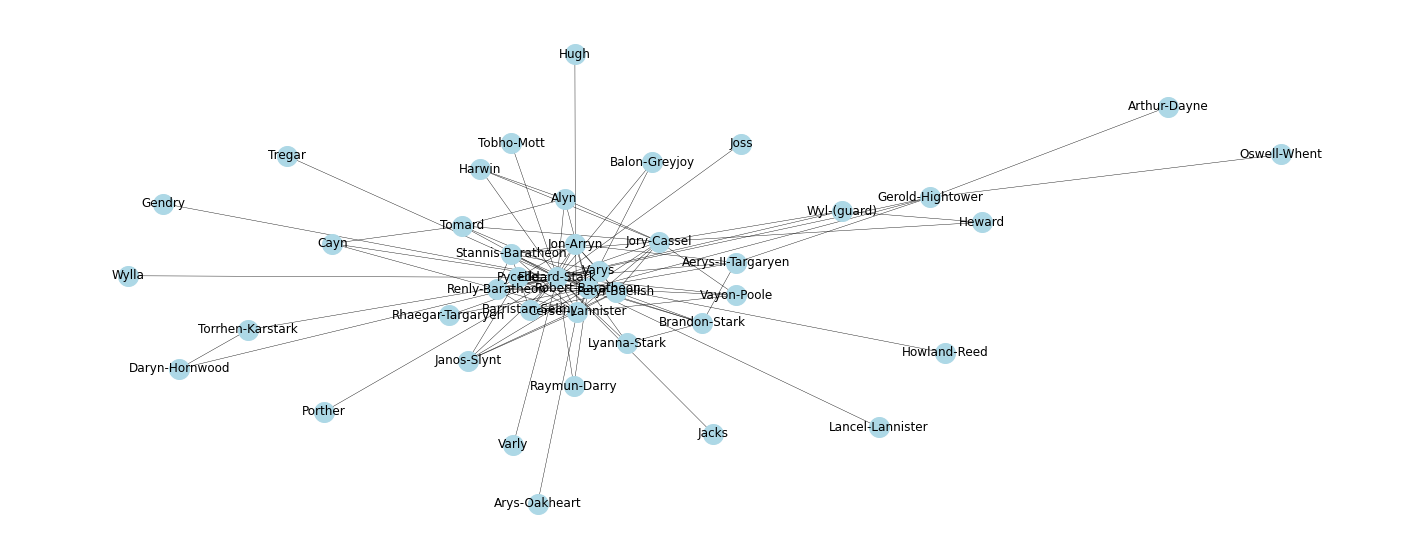

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[6]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

La octava comunidad:

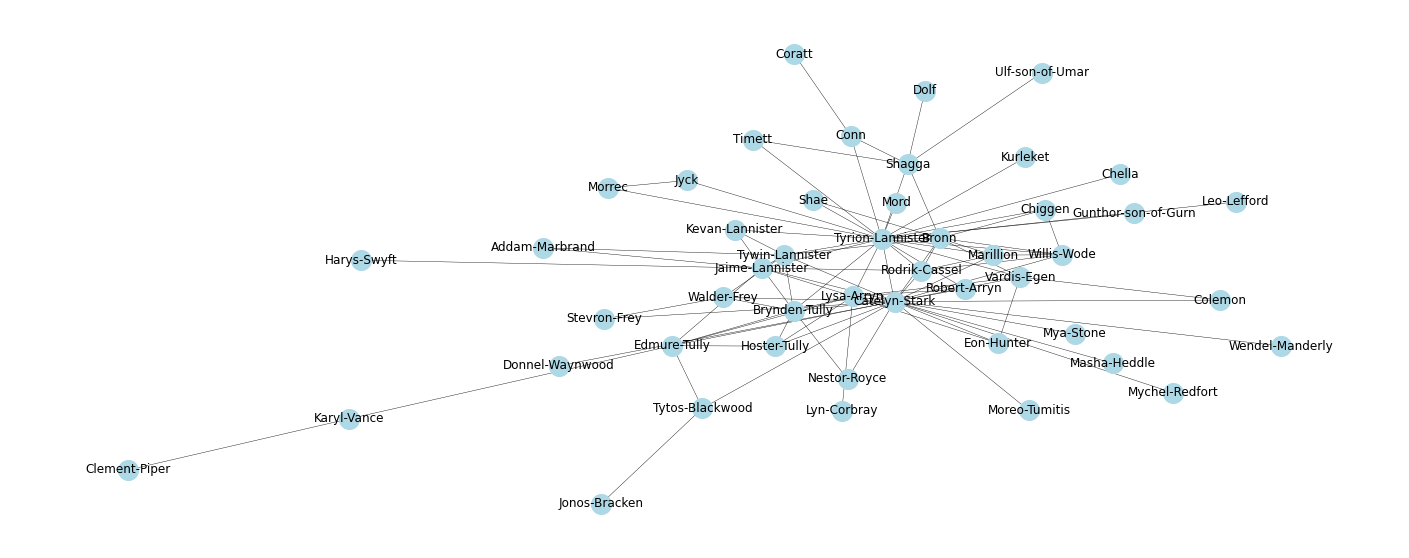

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
nx.draw(nx.subgraph(books[0], partition_dict[7]),with_labels = True, width=0.4, node_color='lightblue', node_size=400)

## Cálculo de métricas para todos los libros

Todos los libros juntos
https://predictivehacks.com/social-network-analysis-of-game-of-thrones/

Ahora vamos a juntar todos los libros en un solo grafo.

In [ ]:
 
li = []
 
for f in book_fnames:
    tmp = pd.read_csv(FILE_PATH+f)
    li.append(tmp)
 
df = pd.concat(li, axis=0, ignore_index=True)
 
df = df.groupby(by=['Source','Target'])['weight'].sum().reset_index()


In [ ]:
df

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,4
2819,Waymar-Royce,Will-(prologue),18
2820,Weasel,Weese,6
2821,Woth,Yoren,4


Tenemos 796 nodos (personajes) y 2823 edges (combinaciones de interacciones entre pares de personajes).

In [ ]:
 
# create the networkx object
 
G = nx.from_pandas_edgelist(df,  source='Source', target='Target')
 
# How to get the number of nodes
 
print(len(G.nodes()))
 
# How to get the number of edges
 
print(len(G.edges()))

796
2823


¿Os suenan los 6 grados de separación?

In [ ]:
!wget https://miro.medium.com/max/1400/0*N_ch0UoeXAMURWuU.jpg

--2022-01-11 09:48:49--  https://miro.medium.com/max/1400/0*N_ch0UoeXAMURWuU.jpg
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129321 (126K) [image/jpeg]
Saving to: ‘0*N_ch0UoeXAMURWuU.jpg’

0*N_ch0UoeXAMURWuU. 100%[===================>] 126.29K  --.-KB/s    in 0.02s   

2022-01-11 09:48:50 (5.76 MB/s) - ‘0*N_ch0UoeXAMURWuU.jpg’ saved [129321/129321]



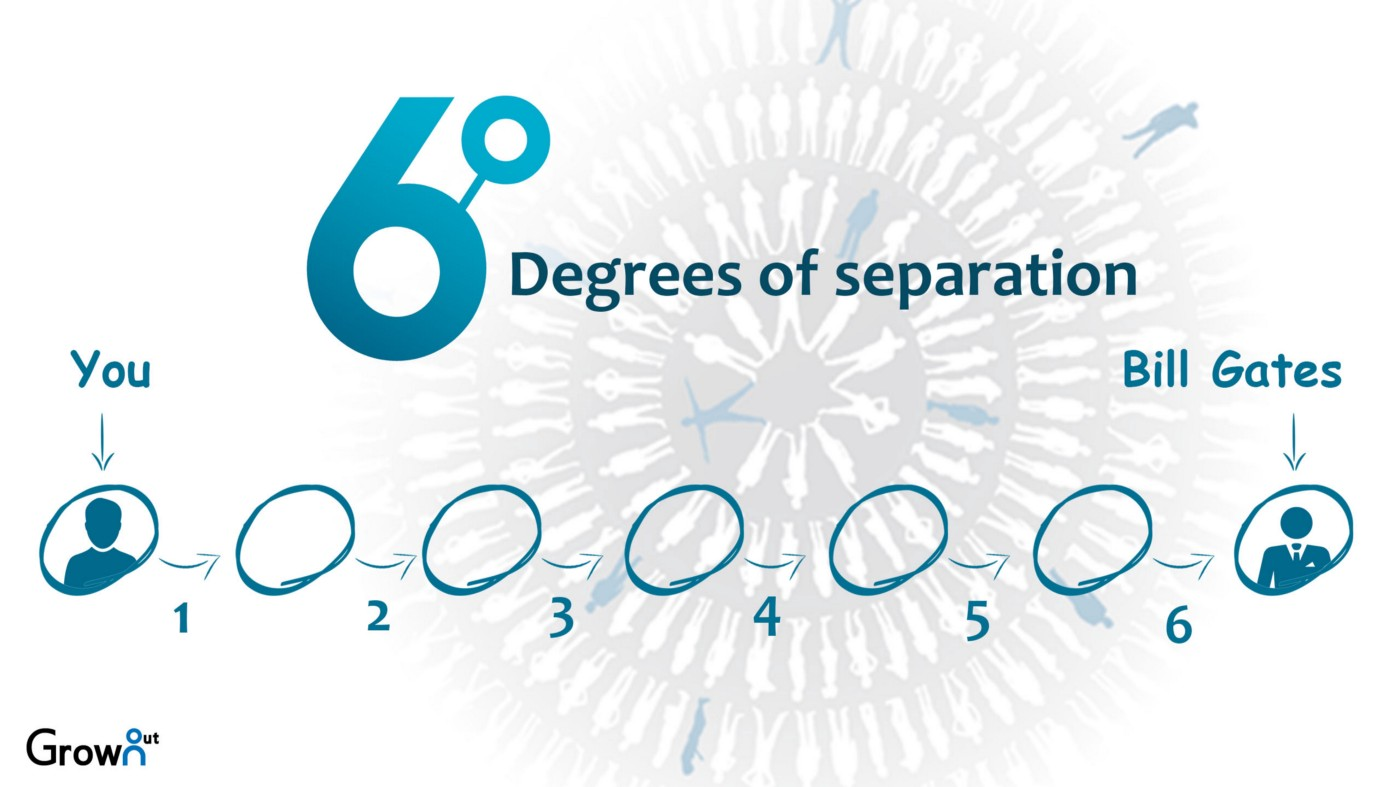

In [ ]:
Image("0*N_ch0UoeXAMURWuU.jpg")

La longitud del camino más corto en nuestra comunidad es 3.41 pasos. Esta métrica se sale de calcular el camino más corto para cada par de todos, y luego hacer la media de todos esos caminos. Nos indica que, de media, hay 3.41 pasos entre un personaje y otro.

In [ ]:
nx.average_shortest_path_length(G)

3.416225783003066

El diámetro de toda la red es 9. Esto es el camino más largo de todos los shortest path:

In [ ]:
nx.diameter(G)

9

In [ ]:
!wget https://www.researchgate.net/profile/Ruggero-G-Bettinardi/publication/317033037/figure/fig50/AS:496043126792203@1495277305613/Figure-C3-Graph-density-The-total-number-of-possible-edges-in-a-undirected-graph-with.png

--2022-01-11 09:48:52--  https://www.researchgate.net/profile/Ruggero-G-Bettinardi/publication/317033037/figure/fig50/AS:496043126792203@1495277305613/Figure-C3-Graph-density-The-total-number-of-possible-edges-in-a-undirected-graph-with.png
Resolving www.researchgate.net (www.researchgate.net)... 104.17.33.105, 104.17.32.105, 2606:4700::6811:2169, ...
Connecting to www.researchgate.net (www.researchgate.net)|104.17.33.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23672 (23K) [image/png]
Saving to: ‘Figure-C3-Graph-density-The-total-number-of-possible-edges-in-a-undirected-graph-with.png’

Figure-C3-Graph-den 100%[===================>]  23.12K  --.-KB/s    in 0.03s   

2022-01-11 09:48:52 (675 KB/s) - ‘Figure-C3-Graph-density-The-total-number-of-possible-edges-in-a-undirected-graph-with.png’ saved [23672/23672]



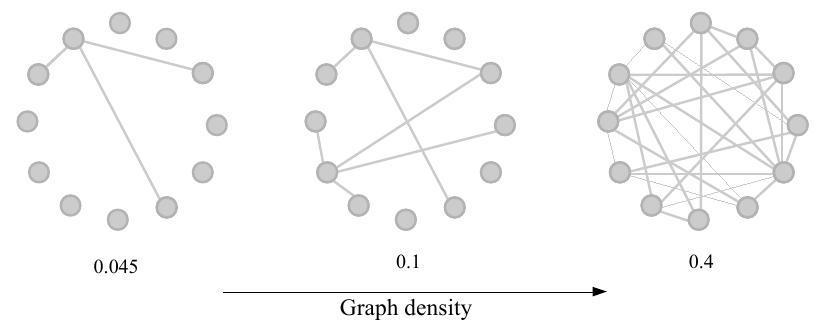

In [ ]:
Image("Figure-C3-Graph-density-The-total-number-of-possible-edges-in-a-undirected-graph-with.png")

La densidad de toda la red es 0.008. ¡Esto quiere decir el porcentaje de conexión medio entre un nodo y todos los demás!

In [ ]:
nx.density(G)

0.008921968332227173